In [1]:
import random
import numpy as np
import sqlite3
import pandas as pd

In [2]:
import penney_db
from importlib import reload
reload(penney_db);
from  penney_db import DB

In [35]:
##making database
d = DB('../Automation_Workflow/test2.db', create=True)
d.build_tables()

In [36]:
sql ='''
SELECT * FROM tPenney
;'''
d.run_query(sql)

,id,p1_guess,p2_guess,p1_cards,p2_cards,p1_tricks,p2_tricks,win_cards,win_tricks


In [37]:
##simulating data to be inserted into database
##making the 64 differenct combinations of guesses
guesses=[]
combos_P1=['BBB', 'BBR', 'BRB', 'BRR', 'RBB', 'RBR'	, 'RRB'	, 'RRR']
combos_P2=['BBB', 'BBR', 'BRB', 'BRR', 'RBB', 'RBR'	, 'RRB'	, 'RRR']
for i in combos_P1:
    for j in combos_P2:
        guesses+=[[i, j]]


In [38]:
cardp1=[]
cardp2=[]
trickp1=[]
trickp2=[]
for i in range(64):
    x=np.random.randint(1,52)
    cardp1+=[x]
    y=52-x
    cardp2+=[y]
    xt=np.random.randint(1,9)
    trickp1+=[xt]
    yt=9-xt
    trickp2+=[yt]

In [39]:
##inserting data into database
for spot in range(64):
    print(spot, guesses[spot][0], guesses[spot][1], cardp1[spot], cardp2[spot], trickp1[spot], trickp2[spot]) 
    ## I was printing these out for the purposes of error catching (error was found in the case of a draw)
    d.who_wins(guesses[spot][0], guesses[spot][1], cardp1[spot], cardp2[spot], trickp1[spot], trickp2[spot])

0 BBB BBB 27 25 8 1
1 BBB BBR 2 50 6 3
2 BBB BRB 46 6 6 3
3 BBB BRR 9 43 4 5
4 BBB RBB 41 11 3 6
5 BBB RBR 27 25 5 4
6 BBB RRB 46 6 6 3
7 BBB RRR 4 48 6 3
8 BBR BBB 21 31 3 6
9 BBR BBR 46 6 2 7
10 BBR BRB 19 33 6 3
11 BBR BRR 48 4 4 5
12 BBR RBB 3 49 3 6
13 BBR RBR 27 25 1 8
14 BBR RRB 11 41 5 4
15 BBR RRR 40 12 6 3
16 BRB BBB 18 34 8 1
17 BRB BBR 22 30 6 3
18 BRB BRB 30 22 5 4
19 BRB BRR 26 26 4 5
20 BRB RBB 32 20 6 3
21 BRB RBR 3 49 2 7
22 BRB RRB 1 51 2 7
23 BRB RRR 8 44 5 4
24 BRR BBB 35 17 6 3
25 BRR BBR 7 45 1 8
26 BRR BRB 4 48 2 7
27 BRR BRR 28 24 1 8
28 BRR RBB 42 10 8 1
29 BRR RBR 38 14 7 2
30 BRR RRB 28 24 7 2
31 BRR RRR 51 1 2 7
32 RBB BBB 11 41 2 7
33 RBB BBR 28 24 4 5
34 RBB BRB 29 23 5 4
35 RBB BRR 26 26 8 1
36 RBB RBB 42 10 2 7
37 RBB RBR 13 39 1 8
38 RBB RRB 46 6 4 5
39 RBB RRR 29 23 5 4
40 RBR BBB 15 37 8 1
41 RBR BBR 31 21 8 1
42 RBR BRB 7 45 4 5
43 RBR BRR 7 45 2 7
44 RBR RBB 2 50 6 3
45 RBR RBR 43 9 1 8
46 RBR RRB 49 3 8 1
47 RBR RRR 33 19 7 2
48 RRB BBB 38 14 8 1
4

In [40]:
##Now am repeating the last 2 blocks of code 2 more times to simulate a small scale of the overall database (and the pcts somewhwat different)
cardp1=[]
cardp2=[]
trickp1=[]
trickp2=[]
for i in range(64):
    x=np.random.randint(1,52)
    cardp1+=[x]
    y=52-x
    cardp2+=[y]
    xt=np.random.randint(1,9)
    trickp1+=[xt]
    yt=9-xt
    trickp2+=[yt]

In [41]:
for spot in range(64):
    print(spot, guesses[spot][0], guesses[spot][1], cardp1[spot], cardp2[spot], trickp1[spot], trickp2[spot]) 
    ## I was printing these out for the purposes of error catching (error was found in the case of a draw)
    d.who_wins(guesses[spot][0], guesses[spot][1], cardp1[spot], cardp2[spot], trickp1[spot], trickp2[spot])

0 BBB BBB 14 38 7 2
1 BBB BBR 15 37 2 7
2 BBB BRB 48 4 8 1
3 BBB BRR 45 7 4 5
4 BBB RBB 37 15 2 7
5 BBB RBR 8 44 2 7
6 BBB RRB 10 42 8 1
7 BBB RRR 18 34 6 3
8 BBR BBB 6 46 4 5
9 BBR BBR 40 12 3 6
10 BBR BRB 12 40 7 2
11 BBR BRR 41 11 1 8
12 BBR RBB 34 18 3 6
13 BBR RBR 49 3 5 4
14 BBR RRB 8 44 5 4
15 BBR RRR 15 37 1 8
16 BRB BBB 31 21 4 5
17 BRB BBR 21 31 8 1
18 BRB BRB 10 42 3 6
19 BRB BRR 1 51 8 1
20 BRB RBB 14 38 1 8
21 BRB RBR 2 50 4 5
22 BRB RRB 10 42 3 6
23 BRB RRR 4 48 5 4
24 BRR BBB 37 15 4 5
25 BRR BBR 29 23 8 1
26 BRR BRB 18 34 2 7
27 BRR BRR 18 34 7 2
28 BRR RBB 30 22 7 2
29 BRR RBR 30 22 1 8
30 BRR RRB 12 40 4 5
31 BRR RRR 40 12 1 8
32 RBB BBB 29 23 4 5
33 RBB BBR 12 40 5 4
34 RBB BRB 23 29 4 5
35 RBB BRR 27 25 3 6
36 RBB RBB 33 19 8 1
37 RBB RBR 20 32 4 5
38 RBB RRB 19 33 8 1
39 RBB RRR 41 11 7 2
40 RBR BBB 12 40 8 1
41 RBR BBR 18 34 6 3
42 RBR BRB 6 46 5 4
43 RBR BRR 13 39 8 1
44 RBR RBB 23 29 6 3
45 RBR RBR 37 15 2 7
46 RBR RRB 42 10 3 6
47 RBR RRR 37 15 2 7
48 RRB BBB 1

In [42]:
cardp1=[]
cardp2=[]
trickp1=[]
trickp2=[]
for i in range(64):
    x=np.random.randint(1,52)
    cardp1+=[x]
    y=52-x
    cardp2+=[y]
    xt=np.random.randint(1,9)
    trickp1+=[xt]
    yt=9-xt
    trickp2+=[yt]

In [43]:
for spot in range(64):
    print(spot, guesses[spot][0], guesses[spot][1], cardp1[spot], cardp2[spot], trickp1[spot], trickp2[spot]) 
    ## I was printing these out for the purposes of error catching (error was found in the case of a draw)
    d.who_wins(guesses[spot][0], guesses[spot][1], cardp1[spot], cardp2[spot], trickp1[spot], trickp2[spot])

0 BBB BBB 34 18 3 6
1 BBB BBR 36 16 5 4
2 BBB BRB 7 45 2 7
3 BBB BRR 13 39 5 4
4 BBB RBB 41 11 8 1
5 BBB RBR 40 12 5 4
6 BBB RRB 41 11 6 3
7 BBB RRR 18 34 2 7
8 BBR BBB 23 29 8 1
9 BBR BBR 41 11 7 2
10 BBR BRB 18 34 3 6
11 BBR BRR 15 37 5 4
12 BBR RBB 49 3 1 8
13 BBR RBR 46 6 7 2
14 BBR RRB 9 43 8 1
15 BBR RRR 32 20 1 8
16 BRB BBB 42 10 3 6
17 BRB BBR 50 2 4 5
18 BRB BRB 41 11 3 6
19 BRB BRR 50 2 4 5
20 BRB RBB 41 11 8 1
21 BRB RBR 45 7 6 3
22 BRB RRB 45 7 6 3
23 BRB RRR 7 45 2 7
24 BRR BBB 37 15 5 4
25 BRR BBR 13 39 1 8
26 BRR BRB 41 11 6 3
27 BRR BRR 24 28 3 6
28 BRR RBB 25 27 5 4
29 BRR RBR 45 7 8 1
30 BRR RRB 30 22 4 5
31 BRR RRR 3 49 2 7
32 RBB BBB 13 39 4 5
33 RBB BBR 40 12 8 1
34 RBB BRB 11 41 1 8
35 RBB BRR 37 15 4 5
36 RBB RBB 44 8 5 4
37 RBB RBR 8 44 5 4
38 RBB RRB 27 25 6 3
39 RBB RRR 14 38 6 3
40 RBR BBB 36 16 3 6
41 RBR BBR 38 14 6 3
42 RBR BRB 26 26 2 7
43 RBR BRR 50 2 6 3
44 RBR RBB 8 44 1 8
45 RBR RBR 30 22 6 3
46 RBR RRB 21 31 7 2
47 RBR RRR 29 23 6 3
48 RRB BBB 39 13 

In [44]:
sql ='''
SELECT * FROM tPenney
;'''
d.run_query(sql)

,id,p1_guess,p2_guess,p1_cards,p2_cards,p1_tricks,p2_tricks,win_cards,win_tricks
0,1,BBB,BBB,27,25,8,1,p1,p1
1,2,BBB,BBR,2,50,6,3,p2,p1
2,3,BBB,BRB,46,6,6,3,p1,p1
3,4,BBB,BRR,9,43,4,5,p2,p2
4,5,BBB,RBB,41,11,3,6,p1,p2
...,...,...,...,...,...,...,...,...,...
187,188,RRR,BRR,33,19,5,4,p1,p1
188,189,RRR,RBB,23,29,3,6,p2,p2
189,190,RRR,RBR,40,12,7,2,p1,p1
190,191,RRR,RRB,32,20,2,7,p1,p2


In [45]:
##getting the counts of how many times player 1 won by card and the total times each combination has been played
sql1="""
SELECT p1_guess, p2_guess, P1WinCardCount, Count(*) AS TimesPlayed
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_cards, Count(*) AS P1WinCardCount 
        -- records the amount of times for each combination of guesses how many times p1 won by card
        from tPenney
        WHERE win_cards='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
GROUP BY p1_guess, p2_guess
"""
d.run_query(sql1)

,p1_guess,p2_guess,P1WinCardCount,TimesPlayed
0,BBB,BBB,2.0,3
1,BBB,BBR,1.0,3
2,BBB,BRB,2.0,3
3,BBB,BRR,1.0,3
4,BBB,RBB,3.0,3
...,...,...,...,...
59,RRR,BRR,2.0,3
60,RRR,RBB,1.0,3
61,RRR,RBR,3.0,3
62,RRR,RRB,3.0,3


In [46]:
##trying now to see the probability of player 1 winning by card amount for each different combination
## I used a left join so 64 rows would be returned (some iterations p1 didnt win by card at all for the 3 decks
##the left join made it so that those rows w/o any p1 listed for wincard were null --> used IFNULL(
##or if P1WinCardCount was 0 when it was 0/3 it orginally returned null so I also made it 0
sql1="""
SELECT p1_guess, p2_guess, IFNULL(P1WinCardCount,0) AS P1CardWinCount , TimesPlayed, IFNULL(1.* P1WinCardCount/TimesPlayed,0) AS P1ProbWinCard
FROM(
    SELECT p1_guess, p2_guess, P1WinCardCount, Count(*) AS TimesPlayed  
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_cards, Count(*) as P1WinCardCount 
        -- records the amount of times for each combination of guesses how many times p1 won by card
        from tPenney
        WHERE win_cards='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
)  

"""
d.run_query(sql1)

,p1_guess,p2_guess,P1CardWinCount,TimesPlayed,P1ProbWinCard
0,BBB,BBB,2,3,0.666667
1,BBB,BBR,1,3,0.333333
2,BBB,BRB,2,3,0.666667
3,BBB,BRR,1,3,0.333333
4,BBB,RBB,3,3,1.000000
...,...,...,...,...,...
59,RRR,BRR,2,3,0.666667
60,RRR,RBB,1,3,0.333333
61,RRR,RBR,3,3,1.000000
62,RRR,RRB,3,3,1.000000


In [47]:
##now trying to make an 8 x 8 array from this -- I realized d was a datframe
sql1="""

SELECT p1_guess, p2_guess, IFNULL(P1WinCardCount,0) AS P1CardWinCount , TimesPlayed, IFNULL(1.* P1WinCardCount/TimesPlayed,0) AS P1ProbWinCard
FROM(
    SELECT p1_guess, p2_guess, P1WinCardCount, Count(*) AS TimesPlayed  
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_cards, Count(*) as P1WinCardCount 
        -- records the amount of times for each combination of guesses how many times p1 won by card
        from tPenney
        WHERE win_cards='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
)


"""
banked=d.run_query(sql1)

In [48]:
banked_arr=banked.to_numpy() 
banked_arr
##have to group them into 8's ##WE ABSOLUTELY NEED TO KNOW THE ORDER IN WHICH THE SIMULATION RUNS EACH COMBO

array([['BBB', 'BBB', 2, 3, 0.6666666666666666],
       ['BBB', 'BBR', 1, 3, 0.3333333333333333],
       ['BBB', 'BRB', 2, 3, 0.6666666666666666],
       ['BBB', 'BRR', 1, 3, 0.3333333333333333],
       ['BBB', 'RBB', 3, 3, 1.0],
       ['BBB', 'RBR', 2, 3, 0.6666666666666666],
       ['BBB', 'RRB', 2, 3, 0.6666666666666666],
       ['BBB', 'RRR', 0, 3, 0.0],
       ['BBR', 'BBB', 0, 3, 0.0],
       ['BBR', 'BBR', 3, 3, 1.0],
       ['BBR', 'BRB', 0, 3, 0.0],
       ['BBR', 'BRR', 2, 3, 0.6666666666666666],
       ['BBR', 'RBB', 2, 3, 0.6666666666666666],
       ['BBR', 'RBR', 3, 3, 1.0],
       ['BBR', 'RRB', 0, 3, 0.0],
       ['BBR', 'RRR', 2, 3, 0.6666666666666666],
       ['BRB', 'BBB', 2, 3, 0.6666666666666666],
       ['BRB', 'BBR', 1, 3, 0.3333333333333333],
       ['BRB', 'BRB', 2, 3, 0.6666666666666666],
       ['BRB', 'BRR', 1, 3, 0.3333333333333333],
       ['BRB', 'RBB', 2, 3, 0.6666666666666666],
       ['BRB', 'RBR', 1, 3, 0.3333333333333333],
       ['BRB', 'RRB', 1, 3,

In [49]:
##retrieving all the probabilites of player 1 winning by card
all_pcts=[]
for i in range(64):
    all_pcts+=[banked_arr[i][-1]]
print(all_pcts)

[0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 1.0, 0.0, 0.6666666666666666, 0.6666666666666666, 1.0, 0.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 1.0, 0.0, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.0, 0.3333333333333333, 0.0, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.3333333333333333, 0.0, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 1.0, 0.3333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 1.0, 1.0, 0.0]


In [50]:
##grouping these percentages into 8's (since the first 8 should all pertain to p1guess==BBB and so on)
new=np.reshape(all_pcts, (8,8))

In [28]:
new

array([[1.        , 0.33333333, 0.66666667, 0.33333333, 1.        ,
        1.        , 1.        , 0.        ],
       [0.        , 0.        , 0.33333333, 1.        , 0.        ,
        0.        , 0.        , 0.66666667],
       [0.66666667, 0.66666667, 1.        , 0.33333333, 0.66666667,
        0.66666667, 0.        , 0.33333333],
       [0.66666667, 0.33333333, 0.33333333, 0.66666667, 0.66666667,
        0.33333333, 0.66666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667, 0.66666667, 0.66666667,
        0.66666667, 0.33333333, 0.66666667],
       [0.        , 0.66666667, 0.66666667, 1.        , 0.66666667,
        1.        , 0.66666667, 0.66666667],
       [0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.33333333,
        0.66666667, 1.        , 0.66666667],
       [0.33333333, 0.        , 0.33333333, 0.33333333, 0.66666667,
        0.33333333, 0.        , 0.33333333]])

In [65]:
d.close()

In [3]:
##now making way to get trick amount percentages
d = DB('../Automation_Workflow/test2.db')

In [4]:
sql ='''
SELECT * FROM tPenney
;'''
d.run_query(sql)

,id,p1_guess,p2_guess,p1_cards,p2_cards,p1_tricks,p2_tricks,win_cards,win_tricks
0,1,BBB,BBB,27,25,8,1,p1,p1
1,2,BBB,BBR,2,50,6,3,p2,p1
2,3,BBB,BRB,46,6,6,3,p1,p1
3,4,BBB,BRR,9,43,4,5,p2,p2
4,5,BBB,RBB,41,11,3,6,p1,p2
...,...,...,...,...,...,...,...,...,...
187,188,RRR,BRR,33,19,5,4,p1,p1
188,189,RRR,RBB,23,29,3,6,p2,p2
189,190,RRR,RBR,40,12,7,2,p1,p1
190,191,RRR,RRB,32,20,2,7,p1,p2


In [5]:
sql="""

SELECT p1_guess, p2_guess, win_tricks, Count(*) AS P1WinTrickCount 
-- records the amount of times for each combination of guesses how many times p1 won by trick
FROM tPenney
WHERE win_tricks='p1'
GROUP BY p1_guess,p2_guess
"""
d.run_query(sql)

,p1_guess,p2_guess,win_tricks,P1WinTrickCount
0,BBB,BBB,p1,2
1,BBB,BBR,p1,2
2,BBB,BRB,p1,2
3,BBB,BRR,p1,1
4,BBB,RBB,p1,1
5,BBB,RBR,p1,2
6,BBB,RRB,p1,3
7,BBB,RRR,p1,2
8,BBR,BBB,p1,1
9,BBR,BBR,p1,1


In [6]:
##getting the counts of how many times player 1 won by trick and the total times each combination has been played
sql1="""
SELECT p1_guess, p2_guess, P1WinTrickCount, Count(*) AS TimesPlayed
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_tricks, Count(*) AS P1WinTrickCount 
-- records the amount of times for each combination of guesses how many times p1 won by trick
        FROM tPenney
        WHERE win_tricks='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
GROUP BY p1_guess, p2_guess
"""
d.run_query(sql1)

,p1_guess,p2_guess,P1WinTrickCount,TimesPlayed
0,BBB,BBB,2.0,3
1,BBB,BBR,2.0,3
2,BBB,BRB,2.0,3
3,BBB,BRR,1.0,3
4,BBB,RBB,1.0,3
...,...,...,...,...
59,RRR,BRR,2.0,3
60,RRR,RBB,2.0,3
61,RRR,RBR,3.0,3
62,RRR,RRB,NaN,3


In [7]:
##determining probability for winning by tricks

sql1="""
SELECT p1_guess, p2_guess, IFNULL(P1WinTrickCount,0) AS P1CardTrickCount , TimesPlayed, IFNULL(1.* P1WinTrickCount/TimesPlayed,0) AS P1ProbWinTrick
FROM(
    SELECT p1_guess, p2_guess, P1WinTrickCount, Count(*) AS TimesPlayed
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_tricks, Count(*) AS P1WinTrickCount 
-- records the amount of times for each combination of guesses how many times p1 won by trick
        FROM tPenney
        WHERE win_tricks='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
)  

"""
d.run_query(sql1)

,p1_guess,p2_guess,P1CardTrickCount,TimesPlayed,P1ProbWinTrick
0,BBB,BBB,2,3,0.666667
1,BBB,BBR,2,3,0.666667
2,BBB,BRB,2,3,0.666667
3,BBB,BRR,1,3,0.333333
4,BBB,RBB,1,3,0.333333
...,...,...,...,...,...
59,RRR,BRR,2,3,0.666667
60,RRR,RBB,2,3,0.666667
61,RRR,RBR,3,3,1.000000
62,RRR,RRB,0,3,0.000000


In [8]:
##retrieving values for those probabilities
banked_t=d.run_query(sql1)

In [9]:
banked_t['P1ProbWinTrick'].values

array([0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.33333333,
       0.66666667, 1.        , 0.66666667, 0.33333333, 0.33333333,
       0.66666667, 0.33333333, 0.        , 0.66666667, 1.        ,
       0.33333333, 0.33333333, 0.66666667, 0.33333333, 0.33333333,
       0.66666667, 0.33333333, 0.33333333, 0.66666667, 0.66666667,
       0.33333333, 0.33333333, 0.33333333, 1.        , 0.66666667,
       0.33333333, 0.        , 0.        , 0.66666667, 0.33333333,
       0.33333333, 0.66666667, 0.33333333, 0.66666667, 1.        ,
       0.66666667, 1.        , 0.33333333, 0.66666667, 0.66666667,
       0.33333333, 0.66666667, 0.66666667, 1.        , 0.66666667,
       1.        , 0.        , 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.33333333, 1.        , 0.66666667, 0.66666667,
       0.66666667, 1.        , 0.        , 0.33333333])

In [10]:
np.reshape(banked_t['P1ProbWinTrick'].values, (8,8))

array([[0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.33333333,
        0.66666667, 1.        , 0.66666667],
       [0.33333333, 0.33333333, 0.66666667, 0.33333333, 0.        ,
        0.66666667, 1.        , 0.33333333],
       [0.33333333, 0.66666667, 0.33333333, 0.33333333, 0.66666667,
        0.33333333, 0.33333333, 0.66666667],
       [0.66666667, 0.33333333, 0.33333333, 0.33333333, 1.        ,
        0.66666667, 0.33333333, 0.        ],
       [0.        , 0.66666667, 0.33333333, 0.33333333, 0.66666667,
        0.33333333, 0.66666667, 1.        ],
       [0.66666667, 1.        , 0.33333333, 0.66666667, 0.66666667,
        0.33333333, 0.66666667, 0.66666667],
       [1.        , 0.66666667, 1.        , 0.        , 0.66666667,
        0.66666667, 0.66666667, 0.66666667],
       [0.33333333, 1.        , 0.66666667, 0.66666667, 0.66666667,
        1.        , 0.        , 0.33333333]])

In [ ]:
##when running the function to create the heatmaps -- the compute probability functions would then be called

In [11]:
##now trying to see if i can combine the 2 queries so that we recieve both trick and card amt probabilities

sql1="""
SELECT *
FROM 
(SELECT p1_guess, p2_guess, IFNULL(P1WinCardCount,0) AS P1CardWinCount , TimesPlayed, IFNULL(1.* P1WinCardCount/TimesPlayed,0) AS P1ProbWinCard
FROM(
    SELECT p1_guess, p2_guess, P1WinCardCount, Count(*) AS TimesPlayed  
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_cards, Count(*) as P1WinCardCount 
        -- records the amount of times for each combination of guesses how many times p1 won by card
        from tPenney
        WHERE win_cards='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
))  
JOIN (
SELECT p1_guess, p2_guess, IFNULL(P1WinTrickCount,0) AS P1CardTrickCount , TimesPlayed_1, IFNULL(1.* P1WinTrickCount/TimesPlayed_1,0) AS P1ProbWinTrick
FROM(
    SELECT p1_guess, p2_guess, P1WinTrickCount, Count(*) AS TimesPlayed_1
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_tricks, Count(*) AS P1WinTrickCount 
-- records the amount of times for each combination of guesses how many times p1 won by trick
        FROM tPenney
        WHERE win_tricks='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
)
) USING (p1_guess, p2_guess)

"""
d.run_query(sql1)

,p1_guess,p2_guess,P1CardWinCount,TimesPlayed,P1ProbWinCard,P1CardTrickCount,TimesPlayed_1,P1ProbWinTrick
0,BBB,BBB,2,3,0.666667,2,3,0.666667
1,BBB,BBR,1,3,0.333333,2,3,0.666667
2,BBB,BRB,2,3,0.666667,2,3,0.666667
3,BBB,BRR,1,3,0.333333,1,3,0.333333
4,BBB,RBB,3,3,1.000000,1,3,0.333333
...,...,...,...,...,...,...,...,...
59,RRR,BRR,2,3,0.666667,2,3,0.666667
60,RRR,RBB,1,3,0.333333,2,3,0.666667
61,RRR,RBR,3,3,1.000000,3,3,1.000000
62,RRR,RRB,3,3,1.000000,0,3,0.000000


In [12]:
##returning only the columns we want

sql1="""
SELECT p1_guess,p2_guess, P1ProbWinCard, P1ProbWinTrick
FROM 
(SELECT p1_guess, p2_guess, IFNULL(P1WinCardCount,0) AS P1CardWinCount , TimesPlayed, IFNULL(1.* P1WinCardCount/TimesPlayed,0) AS P1ProbWinCard
FROM(
    SELECT p1_guess, p2_guess, P1WinCardCount, Count(*) AS TimesPlayed  
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_cards, Count(*) as P1WinCardCount 
        -- records the amount of times for each combination of guesses how many times p1 won by card
        from tPenney
        WHERE win_cards='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
))  
JOIN (
SELECT p1_guess, p2_guess, IFNULL(P1WinTrickCount,0) AS P1CardTrickCount , TimesPlayed_1, IFNULL(1.* P1WinTrickCount/TimesPlayed_1,0) AS P1ProbWinTrick
FROM(
    SELECT p1_guess, p2_guess, P1WinTrickCount, Count(*) AS TimesPlayed_1
    FROM tPenney
    LEFT JOIN (
        SELECT p1_guess, p2_guess, win_tricks, Count(*) AS P1WinTrickCount 
-- records the amount of times for each combination of guesses how many times p1 won by trick
        FROM tPenney
        WHERE win_tricks='p1'
        GROUP BY p1_guess,p2_guess
    ) USING (p1_guess,p2_guess)
    GROUP BY p1_guess, p2_guess
)
) USING (p1_guess, p2_guess)

"""
d.run_query(sql1)

,p1_guess,p2_guess,P1ProbWinCard,P1ProbWinTrick
0,BBB,BBB,0.666667,0.666667
1,BBB,BBR,0.333333,0.666667
2,BBB,BRB,0.666667,0.666667
3,BBB,BRR,0.333333,0.333333
4,BBB,RBB,1.000000,0.333333
...,...,...,...,...
59,RRR,BRR,0.666667,0.666667
60,RRR,RBB,0.333333,0.666667
61,RRR,RBR,1.000000,1.000000
62,RRR,RRB,1.000000,0.000000


In [13]:
##working on spurting out the 8 x 8 array (but 2 different ones so that we follow the "by card" and "by trick")
prob_df=d.run_query(sql1)
prob_p1card=prob_df['P1ProbWinCard'].values
prob_p1trick=prob_df['P1ProbWinTrick'].values

In [14]:
prob_p1card

array([0.66666667, 0.33333333, 0.66666667, 0.33333333, 1.        ,
       0.66666667, 0.66666667, 0.        , 0.        , 1.        ,
       0.        , 0.66666667, 0.66666667, 1.        , 0.        ,
       0.66666667, 0.66666667, 0.33333333, 0.66666667, 0.33333333,
       0.66666667, 0.33333333, 0.33333333, 0.        , 1.        ,
       0.33333333, 0.33333333, 0.33333333, 0.66666667, 1.        ,
       0.66666667, 0.66666667, 0.33333333, 0.66666667, 0.33333333,
       0.66666667, 1.        , 0.        , 0.66666667, 0.66666667,
       0.33333333, 0.66666667, 0.        , 0.33333333, 0.        ,
       1.        , 0.66666667, 1.        , 0.66666667, 0.33333333,
       0.        , 0.66666667, 0.33333333, 0.66666667, 0.33333333,
       1.        , 0.33333333, 0.66666667, 0.66666667, 0.66666667,
       0.33333333, 1.        , 1.        , 0.        ])

In [15]:
prob_p1trick

array([0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.33333333,
       0.66666667, 1.        , 0.66666667, 0.33333333, 0.33333333,
       0.66666667, 0.33333333, 0.        , 0.66666667, 1.        ,
       0.33333333, 0.33333333, 0.66666667, 0.33333333, 0.33333333,
       0.66666667, 0.33333333, 0.33333333, 0.66666667, 0.66666667,
       0.33333333, 0.33333333, 0.33333333, 1.        , 0.66666667,
       0.33333333, 0.        , 0.        , 0.66666667, 0.33333333,
       0.33333333, 0.66666667, 0.33333333, 0.66666667, 1.        ,
       0.66666667, 1.        , 0.33333333, 0.66666667, 0.66666667,
       0.33333333, 0.66666667, 0.66666667, 1.        , 0.66666667,
       1.        , 0.        , 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.33333333, 1.        , 0.66666667, 0.66666667,
       0.66666667, 1.        , 0.        , 0.33333333])

In [16]:
prob_p1card=np.reshape(prob_df['P1ProbWinCard'].values, (8,8))
prob_p1trick=np.reshape(prob_df['P1ProbWinTrick'].values, (8,8))


In [17]:
prob_p1card

array([[0.66666667, 0.33333333, 0.66666667, 0.33333333, 1.        ,
        0.66666667, 0.66666667, 0.        ],
       [0.        , 1.        , 0.        , 0.66666667, 0.66666667,
        1.        , 0.        , 0.66666667],
       [0.66666667, 0.33333333, 0.66666667, 0.33333333, 0.66666667,
        0.33333333, 0.33333333, 0.        ],
       [1.        , 0.33333333, 0.33333333, 0.33333333, 0.66666667,
        1.        , 0.66666667, 0.66666667],
       [0.33333333, 0.66666667, 0.33333333, 0.66666667, 1.        ,
        0.        , 0.66666667, 0.66666667],
       [0.33333333, 0.66666667, 0.        , 0.33333333, 0.        ,
        1.        , 0.66666667, 1.        ],
       [0.66666667, 0.33333333, 0.        , 0.66666667, 0.33333333,
        0.66666667, 0.33333333, 1.        ],
       [0.33333333, 0.66666667, 0.66666667, 0.66666667, 0.33333333,
        1.        , 1.        , 0.        ]])

In [18]:
prob_p1trick

array([[0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.33333333,
        0.66666667, 1.        , 0.66666667],
       [0.33333333, 0.33333333, 0.66666667, 0.33333333, 0.        ,
        0.66666667, 1.        , 0.33333333],
       [0.33333333, 0.66666667, 0.33333333, 0.33333333, 0.66666667,
        0.33333333, 0.33333333, 0.66666667],
       [0.66666667, 0.33333333, 0.33333333, 0.33333333, 1.        ,
        0.66666667, 0.33333333, 0.        ],
       [0.        , 0.66666667, 0.33333333, 0.33333333, 0.66666667,
        0.33333333, 0.66666667, 1.        ],
       [0.66666667, 1.        , 0.33333333, 0.66666667, 0.66666667,
        0.33333333, 0.66666667, 0.66666667],
       [1.        , 0.66666667, 1.        , 0.        , 0.66666667,
        0.66666667, 0.66666667, 0.66666667],
       [0.33333333, 1.        , 0.66666667, 0.66666667, 0.66666667,
        1.        , 0.        , 0.33333333]])

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import random

In [20]:
import os

In [21]:
##now put in dictionaries for the vizualization portion 
viz_input={'Card':prob_p1card, 'Tricks':prob_p1trick}

In [22]:
##viz code (not final -- just using this one I made earlier b4 speaking with Claire)
def make_plots(results: dict, x_labels, y_labels):
    f, axes = plt.subplots(1,2, figsize=(20,8))
    sns.heatmap(data=results['Card'], 
                annot=True, fmt=".3f",xticklabels=x_labels, yticklabels=y_labels, ax=axes[0], cbar=False, cmap="flare", linewidth=0.5)

    sns.heatmap(data=results['Tricks'], 
                annot=True, fmt=".3f",xticklabels=x_labels, yticklabels=y_labels, ax=axes[1], cbar=False, cmap="flare", linewidth=0.5)
    
    plt.subplots_adjust(left=0.1,bottom=0.1,  right=0.9,   top=0.9,   wspace=0, hspace=0.4)

    ##moving color bar in the center -- this is based off of image 1
    im1 = axes[0].imshow(results['Card'], cmap='flare')
    im2 = axes[1].imshow(results['Tricks'])
    
    cbaxes = f.add_axes([0.92, 0.1, 0.02, 0.8])
    cb = plt.colorbar(im1,cax=cbaxes)
    #cb.outline.set_visible(False)
    cb.outline.set_linewidth(0.2)
    
    axes[0].set_title('Win by Card Amount', fontsize=22, y=1.045)
    axes[1].set_title('Win by Trick Amount', fontsize=22, y=1.045)
    
    
    axes[0].set_xlabel('Player 1 Guess', fontsize = 18, labelpad=10)
    axes[0].set_ylabel('Player 2 Guess', fontsize = 18,labelpad=10)
    
    axes[1].set_xlabel('Player 1 Guess', fontsize = 18,labelpad=10)
    
    
    f.suptitle('Probability of Player 1 Winning Penney Game'+' (n=)', fontsize=30, y=1.05)
    plt.savefig('heat_pr_r3'+'_n=.png', bbox_inches = 'tight', facecolor = 'white') 
    ##now need to find a way to move this to a folder named figs
    os.replace('heat_pr_r3'+'_n=.png', 'figs/heat_pr_r4'+'_n=.png') ##still need to talk about how to carry n over here
    plt.show

In [23]:
viz_xlabels=['BBB', 'BBR', 'BRB', 'BRR', 'RBB', 'RBR'	, 'RRB'	, 'RRR'] 
viz_ylabels=['BBB', 'BBR', 'BRB', 'BRR', 'RBB', 'RBR'	, 'RRB'	, 'RRR'] ##likely need to do some more iterations to be positive these are the correct order

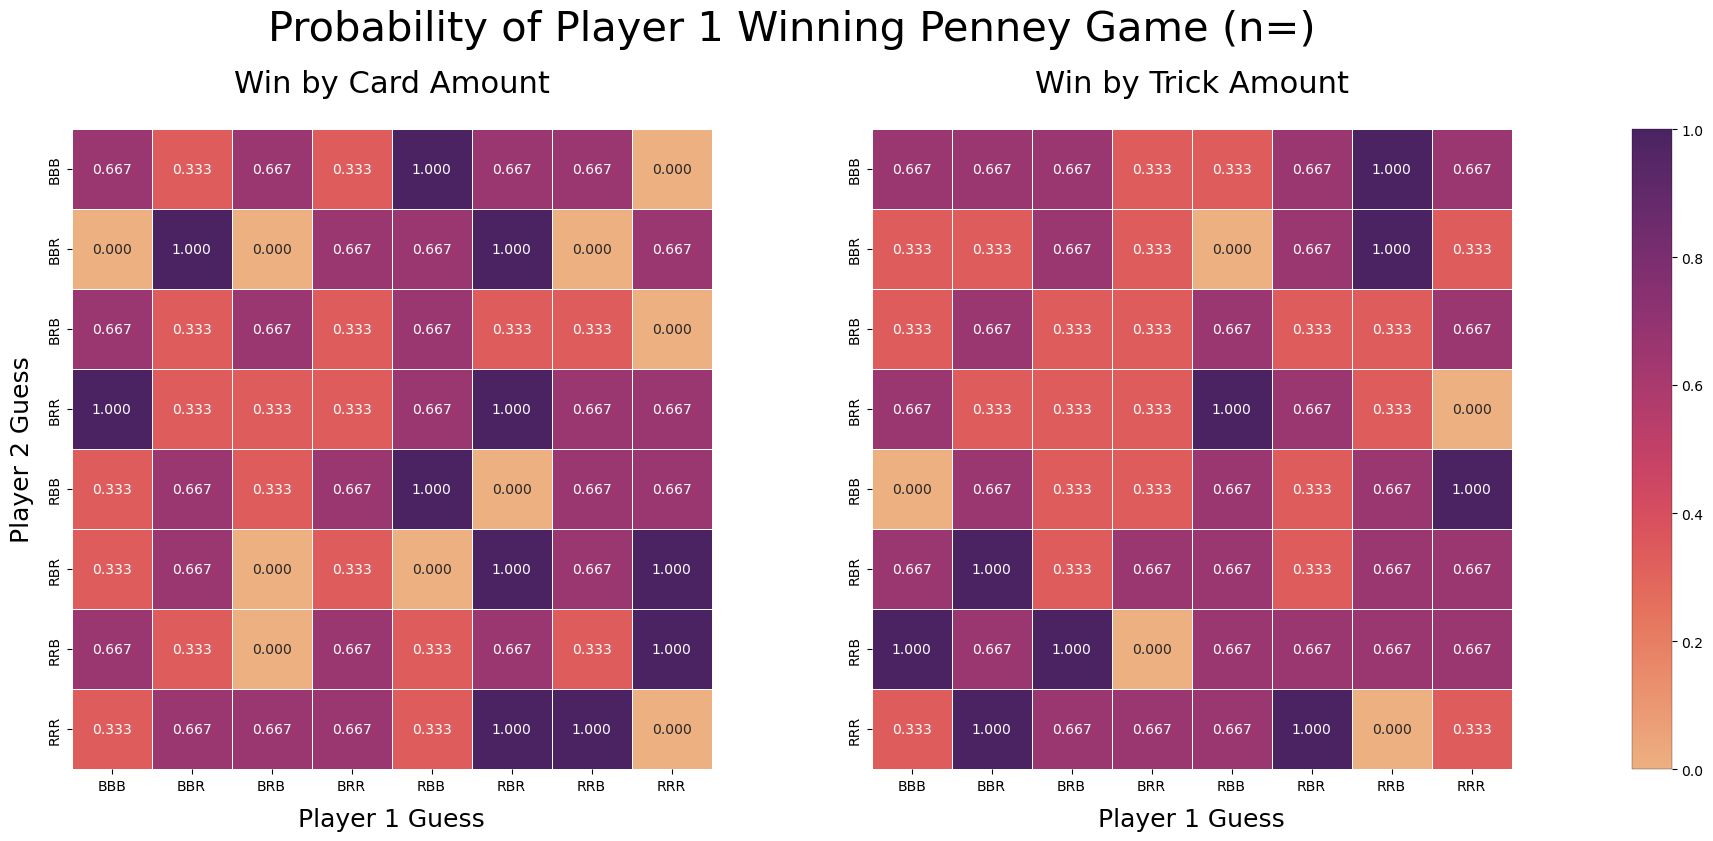

In [24]:
make_plots(viz_input, viz_xlabels, viz_ylabels)

In [31]:
d.close()